In [4]:
# load necessary libraries
library(DBI)
library(corrgram)
library(caret)
library(gridExtra)
library(ggpubr)
library(reshape2)

## Turn Off warnings
options( warn = -1 )

# process in parallel on Windows
#library(doParallel) 
#cl <- makeCluster(detectCores(), type='PSOCK')
#registerDoParallel(cl)

# For MAC OSX and Unix like System
library(doMC)
registerDoMC(cores = 4)

In [5]:
# Load the DataSets: Titanic training Data
dataSet <- read.csv("international-airline-passengers.csv", header = TRUE, sep = ',')
colnames(dataSet)

[1] "Month"     "Passenger"

Month,Passenger
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


,Month,Passenger
135,1960-03,419
136,1960-04,461
137,1960-05,472
138,1960-06,535
139,1960-07,622
140,1960-08,606
141,1960-09,508
142,1960-10,461
143,1960-11,390
144,1960-12,432


[1] 144   2


 factor integer 
      1       1 

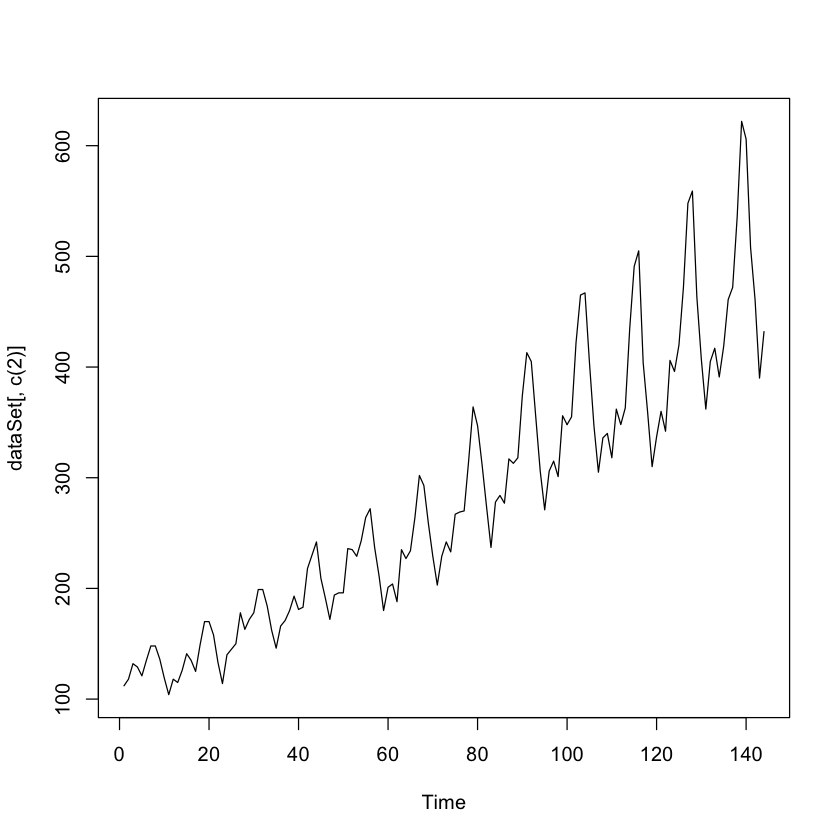

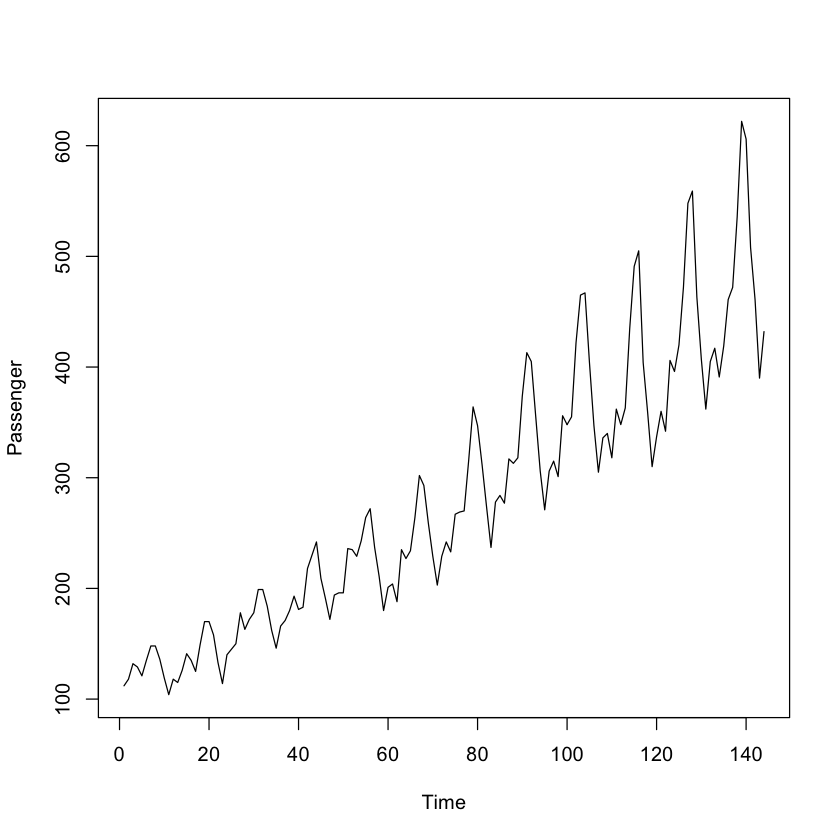

In [6]:
# Print top 10 rows in the dataSet
head(dataSet, 10)
# Print last 10 rows in the dataSet
tail(dataSet, 10)
# Dimention of Dataset
dim(dataSet)
# Check Data types of each column
table(unlist(lapply(dataSet, class)))

plot.ts(dataSet[, c(2)])
plot.ts(dataSet["Passenger"])

In [7]:
# Covert the dataset to a vactor i.e. creating "y" variable
dataSet  <- as.numeric(dataSet[, c("Passenger")])

# Create "x" variable as row numbers / names
names(dataSet) <- 1:length(dataSet)

df <- cbind(read.table(text = names(dataSet)), dataSet)
x = df$V1; y = df$dataSet

In [8]:
# Define the Polynomial model: y ~ poly(x,5, raw = TRUE)
Model = lm(y  ~ poly(x,5, raw = TRUE))

# Summarise the fitted model 
summary(Model)


Call:
lm(formula = y ~ poly(x, 5, raw = TRUE))

Residuals:
    Min      1Q  Median      3Q     Max 
-99.583 -27.071  -5.779  20.798 147.775 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.159e+02  2.413e+01   4.803 4.01e-06 ***
poly(x, 5, raw = TRUE)1  1.592e+00  3.321e+00   0.479    0.632    
poly(x, 5, raw = TRUE)2 -5.899e-03  1.407e-01  -0.042    0.967    
poly(x, 5, raw = TRUE)3  3.780e-04  2.451e-03   0.154    0.878    
poly(x, 5, raw = TRUE)4 -3.483e-06  1.861e-05  -0.187    0.852    
poly(x, 5, raw = TRUE)5  1.033e-08  5.108e-08   0.202    0.840    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.35 on 138 degrees of freedom
Multiple R-squared:  0.8621,	Adjusted R-squared:  0.8571 
F-statistic: 172.5 on 5 and 138 DF,  p-value: < 2.2e-16


In [9]:
# Summarise the r_squared for actual and fitted data 
summary(Model)$r.squared; r2 <- cor(fitted(Model), y)^2; print(r2)

[1] 0.8621002

[1] 0.8621002


In [10]:
# Generate the trendline and fitted values
tendency = coef(Model)[[6]] * x^5 + coef(Model)[[5]] * x^4 + coef(Model)[[4]] * x^3 + coef(Model)[[3]] * x^2 + coef(Model)[[2]] * x + coef(Model)[[1]]
print(tendency)

  [1] 117.4696 119.0463 120.6155 122.1794 123.7399 125.2989 126.8583 128.4197
  [9] 129.9850 131.5556 133.1331 134.7189 136.3145 137.9212 139.5402 141.1727
 [17] 142.8199 144.4827 146.1622 147.8594 149.5750 151.3100 153.0650 154.8407
 [25] 156.6379 158.4571 160.2988 162.1636 164.0518 165.9639 167.9001 169.8609
 [33] 171.8464 173.8569 175.8925 177.9533 180.0395 182.1510 184.2878 186.4501
 [41] 188.6375 190.8502 193.0879 195.3504 197.6376 199.9493 202.2852 204.6450
 [49] 207.0284 209.4351 211.8647 214.3169 216.7913 219.2874 221.8049 224.3432
 [57] 226.9020 229.4807 232.0789 234.6960 237.3316 239.9851 242.6560 245.3437
 [65] 248.0478 250.7677 253.5028 256.2526 259.0165 261.7940 264.5845 267.3875
 [73] 270.2025 273.0289 275.8662 278.7138 281.5713 284.4382 287.3139 290.1981
 [81] 293.0902 295.9898 298.8965 301.8098 304.7295 307.6550 310.5861 313.5224
 [89] 316.4636 319.4095 322.3599 325.3144 328.2729 331.2353 334.2014 337.1711
 [97] 340.1444 343.1212 346.1015 349.0855 352.0731 355.0645 358.

In [11]:
# Generate the forecast in the future time horizon
steps = 25
x_in_Future <- (length(x)+1) : (length(x)+steps)

forecastedValues = coef(Model)[[6]] * x_in_Future^5 + coef(Model)[[5]] * x_in_Future^4 + coef(Model)[[4]] * x_in_Future^3 + coef(Model)[[3]] * x_in_Future^2 + coef(Model)[[2]] * x_in_Future + coef(Model)[[1]]
print(forecastedValues)

 [1] 497.6236 501.7446 505.9372 510.2046 514.5503 518.9778 523.4907 528.0928
 [9] 532.7879 537.5799 542.4729 547.4711 552.5786 557.7999 563.1394 568.6018
[17] 574.1917 579.9140 585.7736 591.7756 597.9250 604.2273 610.6879 617.3122
[25] 624.1060


In [12]:
# Plotting Observed versus Predicted
res <- stack(data.frame(Observed = c(y,forecastedValues), 
                        Predicted = c(tendency, forecastedValues)))
res <- cbind(res, x = rep(c(x,x_in_Future) , 2))

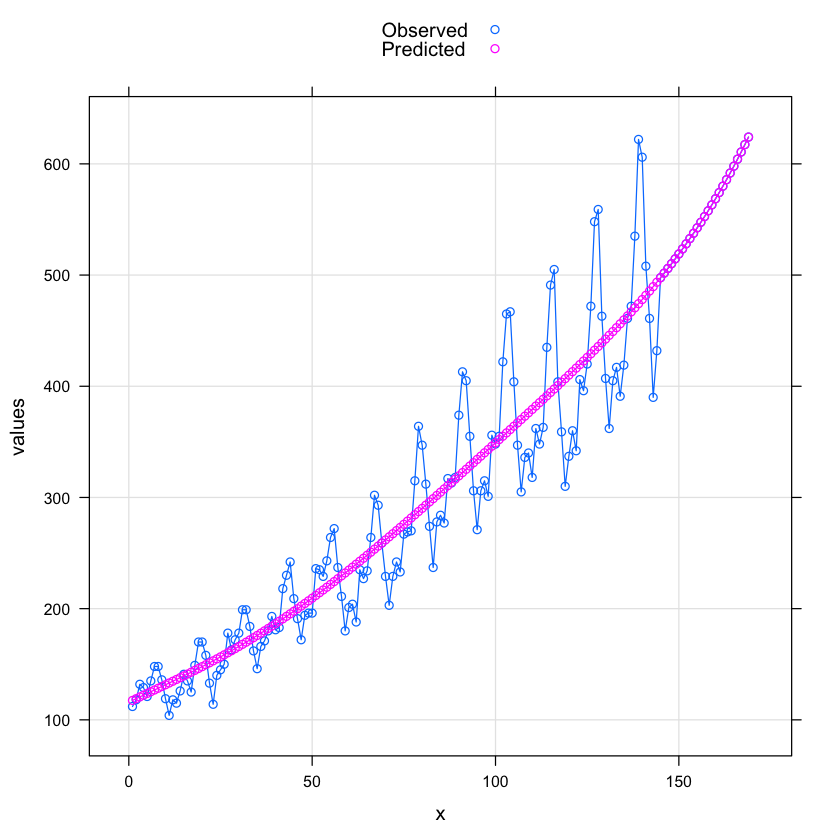

In [13]:
require("lattice")
g1 <- xyplot(values ~ x, data = res, group = ind, auto.key = TRUE, grid = TRUE,
             type=c("p","l"))

library(gridExtra)
grid.arrange(g1, nrow = 1)